In [1]:
# numpy and pandas for data manipulation
import sys
import os
# Suppress warnings
import warnings

import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import cPickle as pickle

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_PACKAGE_DIRECTORY = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter'
root_data = ROOT_PACKAGE_DIRECTORY + '/data'


sys.path.append(ROOT_PACKAGE_DIRECTORY)
from experiment_graph.execution_environment import ExecutionEnvironment
from experiment_graph.benchmark_helper import BenchmarkMetrics

DATABASE_PATH = root_data + '/experiment_graphs/home-credit-default-risk/materialized-no-groupby'
N_ESTIMATOR = 100
from experiment_graph.optimizations.optimizer import HashBasedOptimizer, Optimizer
from experiment_graph.optimizations.Reuse import FastBottomUpReuse
optimizer_type = HashBasedOptimizer.NAME
reuse_type=FastBottomUpReuse.NAME

In [2]:
# Prepare the Data
# Create Execution Environment
ee = ExecutionEnvironment('dedup')

# Load Data
train = ee.load(root_data + '/openml/task_id=31/train.csv')
test = ee.load(root_data + '/openml/task_id=31/test.csv')

test_labels = test['class']
test = test.drop('class')

train_labels = train['class']
train = train.drop(columns=['class'])

from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

# Random Forest 1 (n_estimator = 10)
from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
random_forest10 = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
random_forest10.fit(train, train_labels)

# Execute
random_forest10.trained_node.data()

random_forest10.score(test, test_labels).data()

creating a new root node
creating a new root node


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


{'accuracy': 0.79000000000000004}

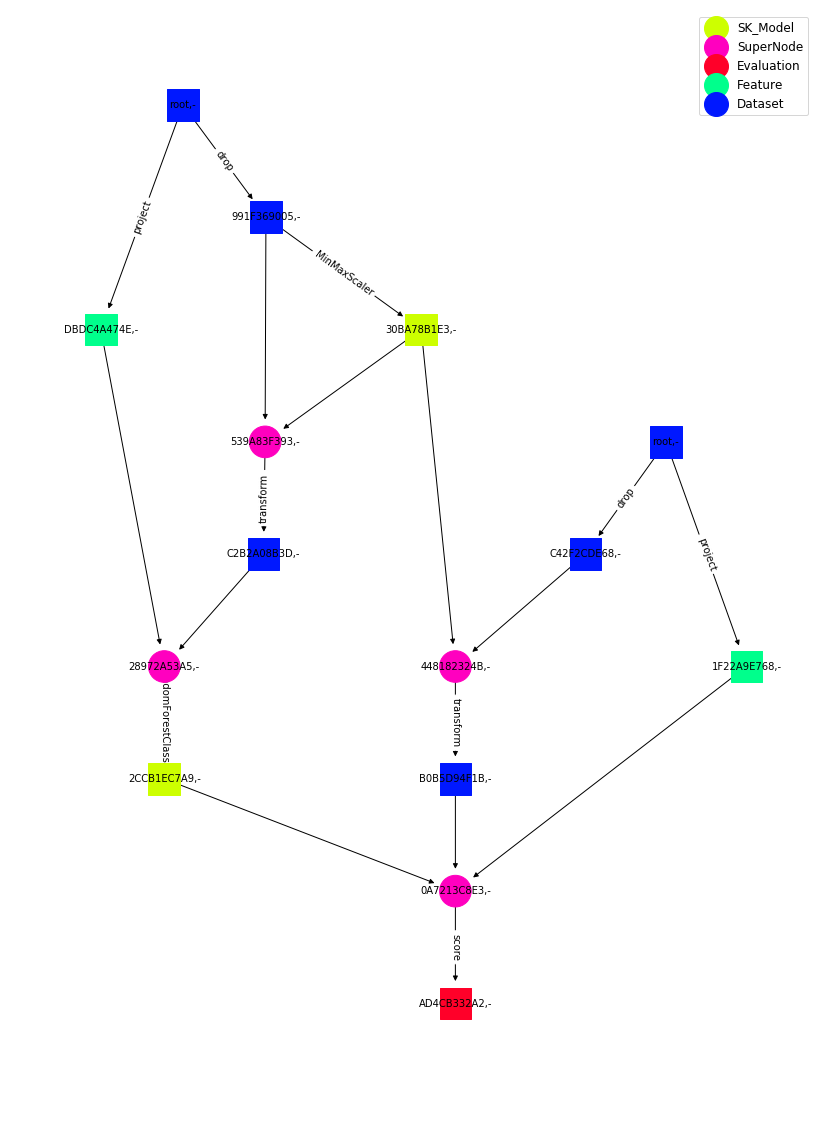

In [3]:
ee.workload_graph.plot_graph(plt, figsize=(14, 20), labels_for_vertex=['id'])

In [4]:
ee.update_history()

history graph is empty, initializing a new one


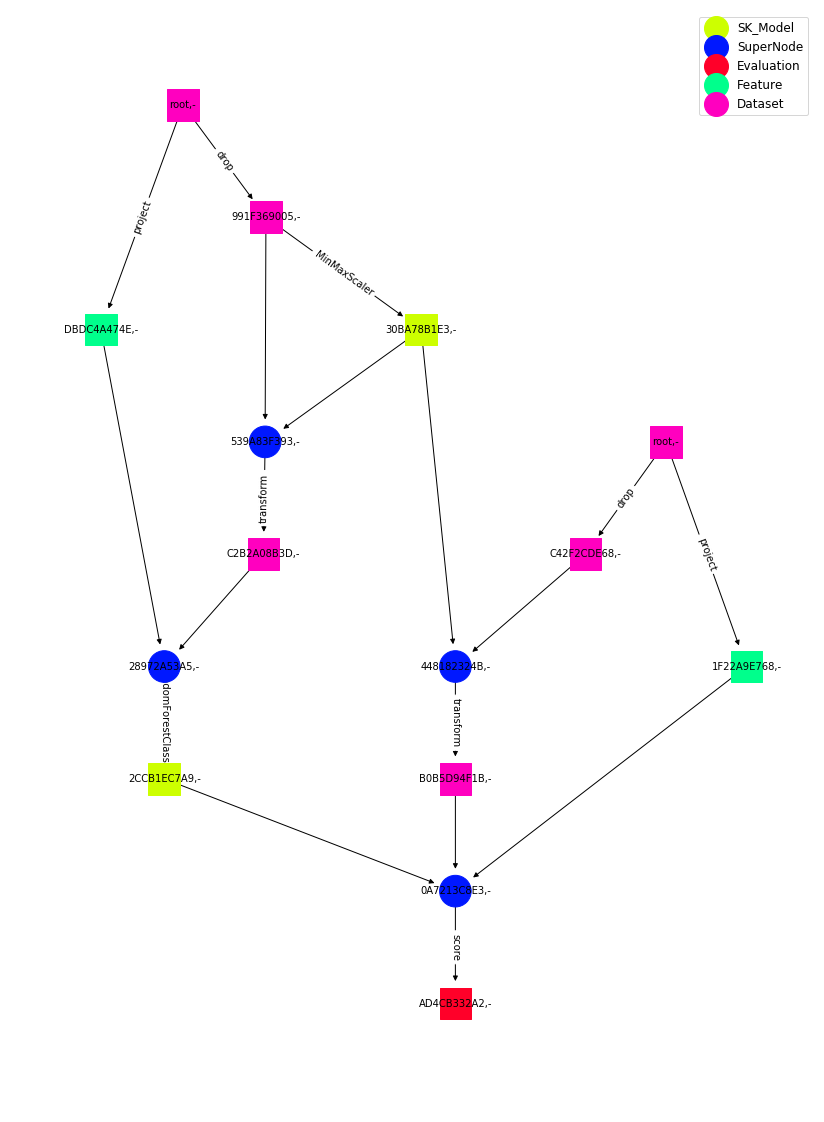

In [5]:
ee.history_graph.plot_graph(plt, figsize=(14, 20), labels_for_vertex=['id'])

In [6]:
ee.history_graph.get_total_size()

522.609375

In [7]:
BUDGET = 300
from experiment_graph.materialization_algorithms.materialization_methods import  StorageAwareMaterializer
sa_materializer = StorageAwareMaterializer(execution_environment=ee, storage_budget=BUDGET, modify_graph=True, verbose=False)
mat_result = sa_materializer.run_and_materialize()

budget in the loop: 61.453125
current size: 238.546875
budget in the loop: 86.4375
current size: 380.578125
budget in the loop: 86.4375
current size: 380.578125


In [8]:
history = ee.history_graph.graph

In [9]:
for n in history.nodes(data=True):
    print n

('AD4CB332A23AF19C1150A43876F369FD', {'recreation_cost': 335.64300000000003, 'meta_freq': 1, 'data': <experiment_graph.execution_environment.Evaluation object at 0x116151b90>, 'potential': 0.79000000000000004, 'num_pipelines': 1, 'rho': 754.22711466666681, 'root': False, 'type': 'Evaluation', 'size': 0.3515625})
('2CCB1EC7A9FF11E906F0C2558E6A6CFF', {'recreation_cost': 178.911, 'meta_freq': 1, 'data': <experiment_graph.execution_environment.SK_Model object at 0x116151bd0>, 'score': 0.79000000000000004, 'num_pipelines': 1, 'rho': 5.3795659589652107, 'root': False, 'type': 'SK_Model', 'potential': 0.79000000000000004, 'size': 26.2734375})
('DBDC4A474E8B084B17D4A95D82CBA082', {'recreation_cost': 2.013, 'meta_freq': 1, 'data': <experiment_graph.execution_environment.Feature object at 0x116151c10>, 'potential': 0.63990000000000014, 'num_pipelines': 1, 'rho': 0.18138525148514856, 'root': False, 'type': 'Feature', 'size': 7.1015625})
('539A83F3935BADF7F9842FFABAFE2430', {'recreation_cost': 11.

In [10]:
9/4

2

In [11]:
15/4

3

In [12]:
15/4.0

3.75

In [13]:
i = 0
while i < 10:
    try:
        if i < 10:
            if i == 5:
                print 'hello'
                v = i
                break
            else:
                i+=1
    except:
        print 'hmmm'

                
print v

hello
5
